<a href="https://colab.research.google.com/github/mjdall/pinterest_scraper/blob/master/get_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
!apt update
!apt install chromium-chromedriver
!pip install selenium==3.141.*

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [56.8 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [5]:
import os

os.chdir("/content/drive/MyDrive/pinterest_scraper/")

In [36]:
from pinterest_scraper import PinterestFetcher

fetcher = PinterestFetcher("morgandally27@yahoo.com", "notmypassword")

In [14]:
suggested_topics = fetcher.get_suggestions()

suggested_topics

,label,link
0,Forearm tattoos,https://www.pinterest.nz/search/pins/?q=Forear...
1,Tattoo sketches,https://www.pinterest.nz/search/pins/?q=Tattoo...
2,Easy drawings,https://www.pinterest.nz/search/pins/?q=Easy%2...
3,Simple doodles,https://www.pinterest.nz/search/pins/?q=Simple...
4,White aesthetic,https://www.pinterest.nz/search/pins/?q=White%...
5,Modern farmhouse kitchens,https://www.pinterest.nz/search/pins/?q=Modern...
6,Interior design,https://www.pinterest.nz/search/pins/?q=Interi...
7,Small bathroom ideas,https://www.pinterest.nz/search/pins/?q=Small%...
8,Dark wallpaper,https://www.pinterest.nz/search/pins/?q=Dark%2...
9,Bullet journal,https://www.pinterest.nz/search/pins/?q=Bullet...


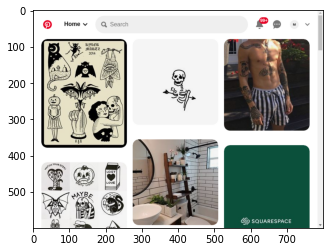

In [37]:
fetcher.screenshot()

In [26]:
scrape_links = suggested_topics.link.values.tolist()
scrape_labels = suggested_topics.label.values.tolist()

scrape_labels

['Forearm tattoos',
 'Tattoo sketches',
 'Easy drawings',
 'Simple doodles',
 'White aesthetic',
 'Modern farmhouse kitchens',
 'Interior design',
 'Small bathroom ideas',
 'Dark wallpaper',
 'Bullet journal',
 'Food porn',
 'Starbucks drinks',
 'Mens clothing styles',
 '90s fashion men',
 'Gentleman style',
 'Androgynous fashion',
 'Modern kitchen design',
 'Minecraft houses',
 'Kitchen interior',
 'Small bathroom ideas',
 'Food porn',
 'Vegan recipes',
 'Vegetarian recipes',
 'Healthy eating']

In [39]:
import pickle
import pandas as pd
import uuid

# scraped_data_list = []
# run_id = uuid.uuid1()
save_directory = f"tmp/{run_id}"
print(f"saving temporary results to {save_directory}")

os.makedirs(save_directory, exist_ok=True)

for label, link_to_scrape in zip(scrape_labels[8:], scrape_links[8:]):
  print(f"scraping: {label}")
  image_links = fetcher.run(link_to_scrape)
  n_links = len(image_links)

  print(f"scraped: {n_links} images to download")
  scraped_data = pd.DataFrame({
      "image_links": image_links,
      "label": label
  })

  with open(f"{save_directory}/{label}.pkl", "wb") as outfile:
    pickle.dump(scraped_data, outfile)

  scraped_data_list.append(scraped_data)


saving temporary results to tmp/b33b0640-b492-11eb-9218-0242ac1c0002
scraping: Dark wallpaper
cant scrape anymore... returning
Done Scraping
scraped: 0 images to download
scraping: Bullet journal
couldnt find image link, may be an error
1.80/100%
couldnt find image link, may be an error
4.80/100%
couldnt find image link, may be an error
6.80/100%
10.40/100%
13.60/100%
couldnt find image link, may be an error
16.60/100%
19.80/100%
23.20/100%
26.00/100%
29.20/100%
32.60/100%
35.80/100%
38.80/100%
42.20/100%
45.40/100%
48.60/100%
51.20/100%
53.00/100%
55.40/100%
57.60/100%
59.20/100%
62.40/100%
64.80/100%
66.40/100%
68.40/100%
71.20/100%
74.20/100%
77.00/100%
79.80/100%
82.80/100%
85.60/100%
88.40/100%
89.60/100%
90.20/100%
92.20/100%
93.80/100%
94.60/100%
couldnt find image link, may be an error
96.20/100%
98.80/100%
100.80/100%
Done Scraping
scraped: 500 images to download
scraping: Food porn
couldnt find image link, may be an error
1.80/100%
5.20/100%
8.00/100%
11.40/100%
couldnt find 

In [32]:
import os
import pickle
import pandas as pd

os.makedirs("data", exist_ok=True)

pickle_dir = "tmp/b33b0640-b492-11eb-9218-0242ac1c0002"
pickles_to_load = os.listdir(pickle_dir)
label_dfs = []

for pickled_file in pickles_to_load:
  with open(f"{pickle_dir}/{pickled_file}", "rb") as infile:
    label_dfs.append(pickle.load(infile))

all_images = pd.concat(label_dfs)
all_images = all_images.reset_index(drop=True)
all_images["group_id"] = (all_images.groupby(["label"]).cumcount()).astype(int)
all_images.to_csv("data/all_image_links.csv")
all_images.sample(20)

,image_links,label,group_id
2735,https://i.pinimg.com/236x/09/56/93/095693f9078...,Modern farmhouse kitchens,235
610,https://i.pinimg.com/236x/ad/43/43/ad43438bf28...,Tattoo sketches,110
2816,https://i.pinimg.com/236x/1a/3b/5a/1a3b5a76e53...,Modern farmhouse kitchens,316
5439,https://i.pinimg.com/236x/e1/81/b5/e181b55f4d4...,Food porn,240
1009,https://i.pinimg.com/236x/63/f8/63/63f86323efa...,Easy drawings,9
5336,https://i.pinimg.com/236x/81/1b/ef/811bef5c752...,Food porn,137
973,https://i.pinimg.com/236x/e2/af/13/e2af13798ae...,Tattoo sketches,473
349,https://i.pinimg.com/236x/84/c2/45/84c245eb912...,Forearm tattoos,349
224,https://i.pinimg.com/236x/e0/fd/f5/e0fdf5dcfcb...,Forearm tattoos,224
2682,https://i.pinimg.com/236x/52/a1/6f/52a16f0c5f1...,Modern farmhouse kitchens,182


In [65]:
from pinterest_scraper import PinterestFetcher

fetcher = PinterestFetcher("morgandally27@yahoo.com", "notmypassword")

In [40]:
import re

def get_save_directory_name(label):
  return("data/" + re.sub(r"\s+", "_" , label.lower()))

def get_save_filename(label, group_index):
  return()

In [46]:
all_images["save_directory"] = all_images.label.apply(
    get_save_directory_name)

save_directories = all_images.save_directory.unique().tolist()

for dir_to_make in save_directories:
  os.makedirs(dir_to_make, exist_ok=True)

In [67]:
grouped_images = all_images.groupby("save_directory")

split_groups = [group for _, group in grouped_images]
download_reference_list = []

for group_df in split_groups:
  group_image_links = group_df.image_links.values.tolist()
  save_directory = group_df.save_directory.values[0]

  print(f"downloading images to: {save_directory}")
  newly_downloaded = fetcher.download(group_image_links, output_directory=save_directory)

  print(f"downloaded: {len(newly_downloaded)} images")
  download_reference_list.append(pd.DataFrame({
      "label": group_df.label.values[0],
      "file_location": newly_downloaded,
      "group_id": group_df.group_id.values
  }))

download_reference = pd.concat(download_reference_list)
download_reference.reset_index(drop=True, inplace=True)
download_reference.sample(20)

downloading images to: data/90s_fashion_men
0.00/100%
24.15/100%
48.31/100%
72.46/100%
96.62/100%
downloaded: 207 images
downloading images to: data/bullet_journal
0.00/100%
10.00/100%
20.00/100%
30.00/100%
40.00/100%
50.00/100%
60.00/100%
70.00/100%
80.00/100%
90.00/100%
downloaded: 500 images
downloading images to: data/easy_drawings
0.00/100%
10.00/100%
20.00/100%
30.00/100%
40.00/100%
50.00/100%
60.00/100%
70.00/100%
80.00/100%
90.00/100%
downloaded: 500 images
downloading images to: data/food_porn
0.00/100%
10.00/100%
20.00/100%
30.00/100%
40.00/100%
50.00/100%
60.00/100%
70.00/100%
80.00/100%
90.00/100%
downloaded: 500 images
downloading images to: data/forearm_tattoos
0.00/100%
10.00/100%
20.00/100%
30.00/100%
40.00/100%
50.00/100%
60.00/100%
70.00/100%
80.00/100%
90.00/100%
downloaded: 500 images
downloading images to: data/interior_design
0.00/100%
10.00/100%
20.00/100%
30.00/100%
40.00/100%
50.00/100%
60.00/100%
70.00/100%
80.00/100%
90.00/100%
downloaded: 500 images
download

,label,file_location,group_id
799,Easy drawings,data/easy_drawings/19814740e243115cb16cfadfcc2...,92
1834,Forearm tattoos,data/forearm_tattoos/b4b70c2c7841563cabfe9a543...,127
4373,Starbucks drinks,data/starbucks_drinks/675504ab7cf6cf21bfaa747c...,166
5686,White aesthetic,data/white_aesthetic/024b5734b5c4ecd90eb31d2db...,487
1154,Easy drawings,data/easy_drawings/ba3c0e46ef79c68c754317e3e9f...,447
4776,Tattoo sketches,data/tattoo_sketches/4540a21c554d095451e82bbe6...,77
5126,Tattoo sketches,data/tattoo_sketches/78989d628a8aa10a512bb8ce9...,427
1163,Easy drawings,data/easy_drawings/e86f88754b4327396f206d6521e...,456
4068,Simple doodles,data/simple_doodles/13b4502b2ce541267af193ac81...,361
3919,Simple doodles,data/simple_doodles/1fd55c25e62443f172c7bdf507...,212


In [68]:
download_reference.to_csv("data/image_reference.csv")

In [69]:
download_reference

,label,file_location,group_id
0,90s fashion men,data/90s_fashion_men/cfaf965d69f685d8e69956ba7...,0
1,90s fashion men,data/90s_fashion_men/fa6f7f62186191520d17ec3df...,1
2,90s fashion men,data/90s_fashion_men/d9cb8bce7608cf99e01f24c98...,2
3,90s fashion men,data/90s_fashion_men/680414f948622b0203c1b0056...,3
4,90s fashion men,data/90s_fashion_men/f0cba34dd73764ef7b9962527...,4
...,...,...,...
5694,White aesthetic,data/white_aesthetic/448946d180a5f9d9df8cbcf76...,495
5695,White aesthetic,data/white_aesthetic/ea64d4023642884c808f6c7e7...,496
5696,White aesthetic,data/white_aesthetic/79b0856002598d613564b80eb...,497
5697,White aesthetic,data/white_aesthetic/7f2ec49fdd6c5928ddad23a87...,498
